For this task the gold labels for the test set are available. I made a function below to ease the process of loading the dataset. Feel free to use it.

In [3]:
import numpy as np
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


In [4]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist() # you can use this function (copying the whole box) in your code to easily load the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


In [5]:
from sklearn.model_selection import train_test_split
X_tr, X_val , Y_tr, Y_val = train_test_split(X_train,Y_train, test_size = 0.25, random_state = 42)

print(X_tr.shape, Y_tr.shape, X_val.shape, Y_val.shape)

(45000, 784) (45000,) (15000, 784) (15000,)


In [6]:
print(Y_train.shape)
print(X_train.shape)



(60000,)
(60000, 784)


In [7]:
import numpy as np

X = np.concatenate((X_train,X_test))
Y = np.concatenate((Y_train,Y_test))

print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (70000, 784)
Shape of Y: (70000,)


In [8]:
import numpy as np

# Define label names
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


# Convert numeric labels to label names
Y_labels = [label_names[label] for label in Y]
for i in range(10):
  print(f'{i+1: >2}. {label_names[i]}')



 1. T-shirt/top
 2. Trouser
 3. Pullover
 4. Dress
 5. Coat
 6. Sandal
 7. Shirt
 8. Sneaker
 9. Bag
10. Ankle boot


# Data Normalization



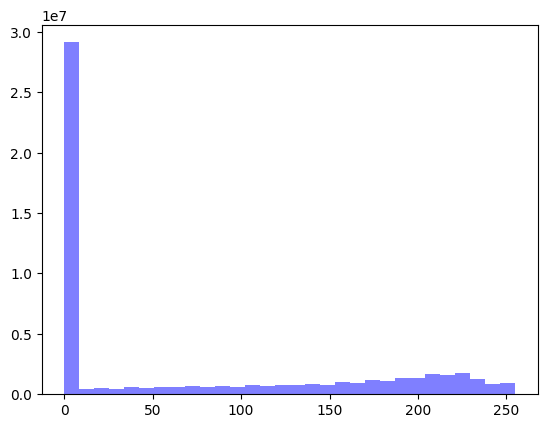

In [9]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

"this is the data before normalization, now we need to analyze the situation after normalization"
x = X.flatten()
num_bins = 30
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Now we rescale image pixel values by dividing it by 255 (which is max pixel value) to be sure that they are in [0,1] range.

In [10]:
X_tr = X_tr/255
X_test = X_test/255
X_val = X_val/255

In [11]:
"checking max pixel values"

print("Max pixel value after normalization:", X_tr.max())
print("Max pixel value after normalization for val set",X_val.max())
print("Max pixel value after normalization for test set",X_test.max())



Max pixel value after normalization: 1.0
Max pixel value after normalization for val set 1.0
Max pixel value after normalization for test set 1.0


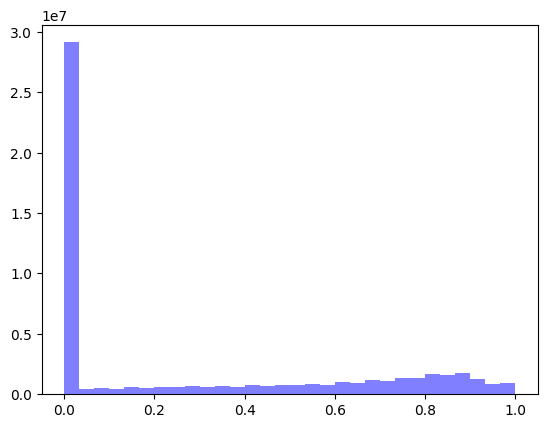

In [12]:
"Pixel values after normalization"
X_sc = np.concatenate((X_tr,X_val,X_test))
xsc = X_sc.flatten()
num_bins = 30
n, bins, patches = plt.hist(xsc, num_bins, facecolor='blue', alpha=0.5)
plt.show()

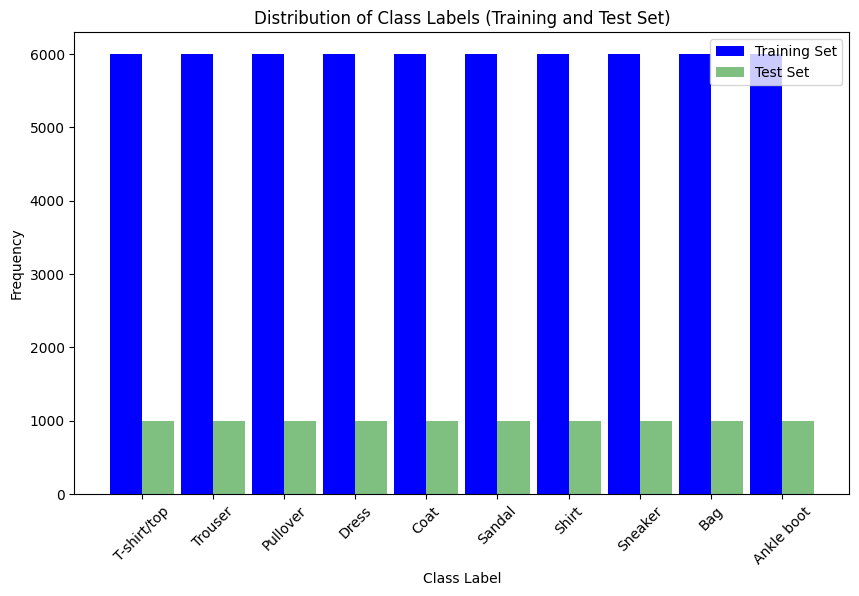

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the labels of the training and test sets
Y_combined = np.concatenate((Y_train, Y_test))

# Count the frequency of each class label in the training set
label_counts_train = {label: list(Y_train).count(label) for label in range(10)}

# Count the frequency of each class label in the test set
label_counts_test = {label: list(Y_test).count(label) for label in range(10)}

# Set the width of each bar
bar_width = 0.45

# Set the positions of the bars for the training and test sets
bar_positions_train = np.arange(10)
bar_positions_test = bar_positions_train + bar_width

# Plot the distribution
plt.figure(figsize=(10, 6))

# Plot training set distribution
plt.bar(bar_positions_train, label_counts_train.values(), bar_width, color='blue', label='Training Set')

# Plot test set distribution
plt.bar(bar_positions_test, label_counts_test.values(), bar_width, color='green', label='Test Set', alpha=0.5)

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels (Training and Test Set)')
plt.xticks(bar_positions_train + bar_width / 2, [label_names[i] for i in range(10)], rotation=45)
plt.legend()
plt.show()


In [14]:
from tensorflow.keras.utils import to_categorical
num_classes = len(set(Y))
Y_train_cat = to_categorical(Y_train, num_classes)
Y_val_cat = to_categorical(Y_val, num_classes)

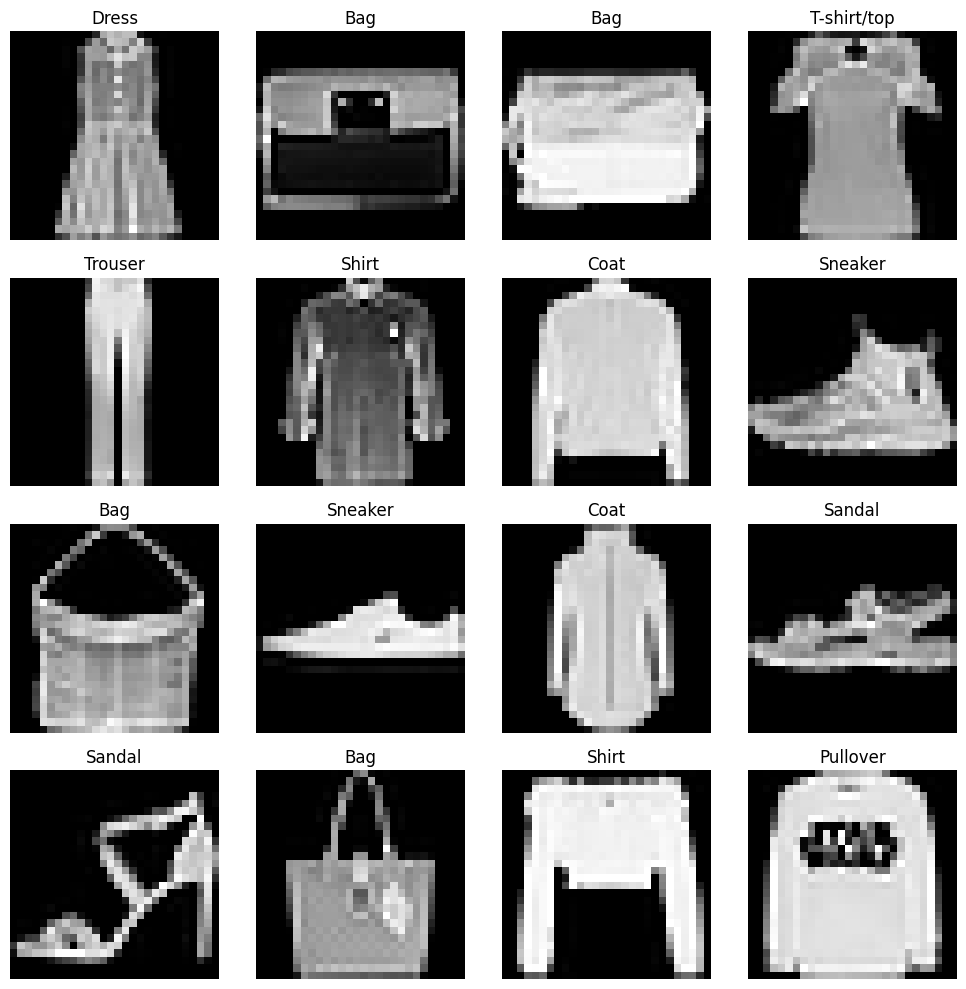

In [15]:
import matplotlib.pyplot as plt
import random

# Define the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 4

# Create a figure and set its size
plt.figure(figsize=(10, 10))

# Randomly select images and plot them
for i in range(num_rows * num_cols):
    # Randomly select an index
    index = random.randint(0, len(X) - 1)

    # Get the image and its label
    image = X[index]
    label = Y_combined[index]

    # Reshape the image from flat to 28x28 (assuming MNIST-like dataset)
    image = image.reshape((28, 28))

    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(label_names[label])
    plt.axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


# Models

1)Logistic regression


In [16]:
import os

def load_or_train(filename, train_func):
    print(f"Attempting to load model from {filename}")
    if os.path.exists(filename):
        print("Model file found.")
        try:
            with open(filename, "rb") as f:
                return pickle.load(f)
        except (OSError, IOError, pickle.PickleError) as e:
            print(f"Error loading model: {e}")
    else:
        print("Model file not found. Training new model.")

    model = train_func()
    try:
        with open(filename, 'wb') as f:
            pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)
        print(f"Model saved to {filename}")
    except (OSError, IOError, pickle.PickleError) as e:
        print(f"Error saving model: {e}")

    return model


In [16]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# List of hyperparameters to try
C_values = [0.1, 0.2, 0.5, 1, 2]

# Function to train the model with a given hyperparameter C
def train_logreg(X_tr, Y_tr, C_value):
    model = LogisticRegression(C=C_value, n_jobs=-1, tol=1e-3, random_state=123)
    model.fit(X_tr, Y_tr)
    return model

# Function to evaluate the model on a given dataset
def evaluate_model(model, X, Y):
    accuracy = accuracy_score(Y, model.predict(X))
    return accuracy

# Function to find the best model based on validation set
def logreg():
    best_model = None
    best_val_accuracy = 0
    best_C = None

    for C in C_values:
        model = train_logreg(X_tr, Y_tr, C)
        val_accuracy = evaluate_model(model, X_val, Y_val)
        print(f"C={C}, Validation Accuracy={val_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_C = C

    # Print best hyperparameters and their accuracies
    best_train_accuracy = evaluate_model(best_model, X_tr, Y_tr)
    best_val_accuracy = evaluate_model(best_model, X_val, Y_val)
    print(f"Best Hyperparameters: C={best_C}")
    print(f"Best Training Accuracy: {best_train_accuracy:.4f}")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model


# Load or train the logistic regression model
clf_log = load_or_train("logisticregession.model", logreg)


Attempting to load model from logisticregession.model
Model file not found. Training new model.


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


C=0.1, Validation Accuracy=0.8569
C=0.2, Validation Accuracy=0.8547
C=0.5, Validation Accuracy=0.8551
C=1, Validation Accuracy=0.8543
C=2, Validation Accuracy=0.8542
Best Hyperparameters: C=0.1
Best Training Accuracy: 0.8678
Best Validation Accuracy: 0.8569
Model saved to logisticregession.model


In [17]:
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load or train the logistic regression model
clf_log = load_or_train("logisticregession.model", logreg)

# Make predictions on the test set
Y_test_pred = clf_log.predict(X_test)




Attempting to load model from logisticregession.model
Model file found.


**Function for evaluating and displaying confussion matrices**

By defining a function for confusion matrix, we can save a lot of time, by just calling it for each model rather than doing explicitely every single time.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred, labels_dict):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Define the class labels using the labels_dict dictionary
    class_labels = [labels_dict[i] for i in range(len(labels_dict))]

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()





Attempting to load model from logisticregession.model
Model file found.
Test Accuracy: 0.8421


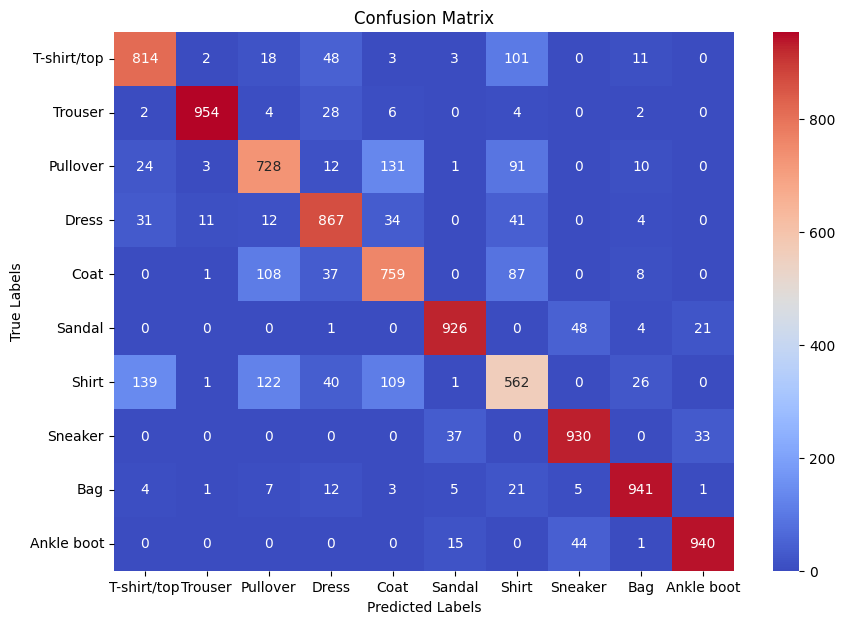

In [19]:
clf_log = load_or_train("logisticregession.model", logreg)

# Make predictions on the test set
Y_test_pred = clf_log.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_test_pred, label_names)

**Perceptron**

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# List of hyperparameters to try
early_stopping_values = [True, False]
fit_intercept_values = [True, False]

# Function to train the Perceptron model with given hyperparameters
def train_perceptron(X_train, Y_train, early_stopping, fit_intercept):
    model = Perceptron(tol=1e-3, random_state=0, early_stopping=early_stopping, fit_intercept=fit_intercept)
    model.fit(X_train, Y_train)
    return model

# Function to evaluate the model on a given dataset
def evaluate_model(model, X, Y):
    accuracy = accuracy_score(Y, model.predict(X))
    return accuracy

# Function to find the best model based on validation set
def perceptron():
    best_model = None
    best_val_accuracy = 0
    best_params = {}

    for early_stopping in early_stopping_values:
        for fit_intercept in fit_intercept_values:
            model = train_perceptron(X_tr, Y_tr, early_stopping, fit_intercept)
            val_accuracy = evaluate_model(model, X_val, Y_val)
            print(f"early_stopping={early_stopping}, fit_intercept={fit_intercept}, Validation Accuracy={val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                best_params = {'early_stopping': early_stopping, 'fit_intercept': fit_intercept}

    # Print best hyperparameters and their accuracies
    best_train_accuracy = evaluate_model(best_model, X_train, Y_train)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Training Accuracy: {best_train_accuracy:.4f}")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model

# Load or train the Perceptron model
clf_perc = load_or_train("perc.model", perceptron)


Attempting to load model from perc.model
Model file not found. Training new model.
early_stopping=True, fit_intercept=True, Validation Accuracy=0.8269
early_stopping=True, fit_intercept=False, Validation Accuracy=0.8321
early_stopping=False, fit_intercept=True, Validation Accuracy=0.8125
early_stopping=False, fit_intercept=False, Validation Accuracy=0.7793
Best Hyperparameters: {'early_stopping': True, 'fit_intercept': False}
Best Training Accuracy: 0.8443
Best Validation Accuracy: 0.8321
Model saved to perc.model


Attempting to load model from perc.model
Model file found.
Test Accuracy: 0.8265


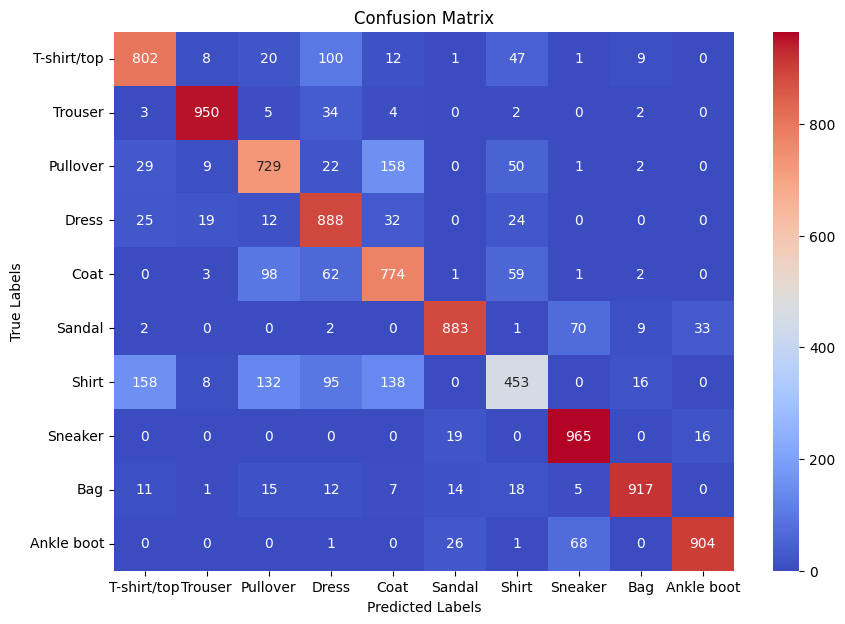

In [21]:
clf_log = load_or_train("perc.model", perceptron)

# Make predictions on the test set
Y_test_pred_percp = clf_perc.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred_percp)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_test_pred_percp, label_names)

**Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of hyperparameters to try
max_depth_values = [2, 5, 10, 20, 30]
min_samples_split_values = [2, 3,5,10]

# Function to train the Decision Tree model with given hyperparameters
def train_decision_tree(X_train, Y_train, max_depth, min_samples_split):
    model = DecisionTreeClassifier(random_state=123, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_tr, Y_tr)
    return model

# Function to evaluate the model on a given dataset
def evaluate_model(model, X, Y):
    accuracy = accuracy_score(Y, model.predict(X))
    return accuracy

# Function to find the best model based on validation set
def find_best_decision_tree():
    best_model = None
    best_val_accuracy = 0
    best_params = {}

    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            model = train_decision_tree(X_tr, Y_tr, max_depth, min_samples_split)
            val_accuracy = evaluate_model(model, X_val, Y_val)
            print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, Validation Accuracy={val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

    # Print best hyperparameters and their accuracies
    best_train_accuracy = evaluate_model(best_model, X_tr, Y_tr)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Training Accuracy: {best_train_accuracy:.4f}")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model

# Load or train the Decision Tree model
clf_tree = load_or_train("dectree.model", find_best_decision_tree)


Attempting to load model from dectree.model
Model file not found. Training new model.
max_depth=2, min_samples_split=2, Validation Accuracy=0.3584
max_depth=2, min_samples_split=3, Validation Accuracy=0.3584
max_depth=2, min_samples_split=5, Validation Accuracy=0.3584
max_depth=2, min_samples_split=10, Validation Accuracy=0.3584
max_depth=5, min_samples_split=2, Validation Accuracy=0.7086
max_depth=5, min_samples_split=3, Validation Accuracy=0.7086
max_depth=5, min_samples_split=5, Validation Accuracy=0.7086
max_depth=5, min_samples_split=10, Validation Accuracy=0.7086
max_depth=10, min_samples_split=2, Validation Accuracy=0.8061
max_depth=10, min_samples_split=3, Validation Accuracy=0.8074
max_depth=10, min_samples_split=5, Validation Accuracy=0.8063
max_depth=10, min_samples_split=10, Validation Accuracy=0.8071
max_depth=20, min_samples_split=2, Validation Accuracy=0.7998
max_depth=20, min_samples_split=3, Validation Accuracy=0.8027
max_depth=20, min_samples_split=5, Validation Accur

Attempting to load model from dectree.model
Model file found.
Test Accuracy: 0.7973


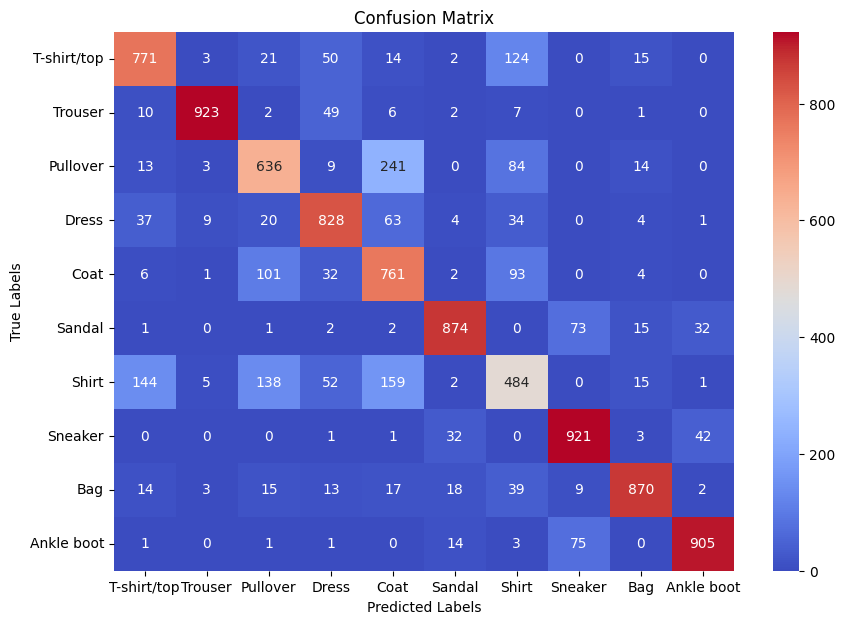

In [33]:
clf_tree = load_or_train("dectree.model", find_best_decision_tree)

# Make predictions on the test set
Y_test_pred_tree = clf_tree.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred_tree)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_test_pred_tree, label_names)

**SVM**

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# List of hyperparameters to try
kernel_values = ['rbf', 'linear']
C_values = [0.5, 1, 2, 4]

# Function to train the SVC model with given hyperparameters
def train_svc(X_train, Y_train, kernel, C):
    model = SVC(random_state=123, kernel=kernel, C=C)
    model.fit(X_tr, Y_tr)
    return model

# Function to evaluate the model on a given dataset
def evaluate_model(model, X, Y):
    accuracy = accuracy_score(Y, model.predict(X))
    return accuracy

# Function to find the best model based on validation set
def svc():
    best_model = None
    best_val_accuracy = 0
    best_params = {}

    for kernel in kernel_values:
        for C in C_values:
            model = train_svc(X_tr, Y_tr, kernel, C)
            val_accuracy = evaluate_model(model, X_val, Y_val)
            print(f"kernel={kernel}, C={C}, Validation Accuracy={val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                best_params = {'kernel': kernel, 'C': C}

    # Print best hyperparameters and their accuracies
    best_train_accuracy = evaluate_model(best_model, X_tr, Y_tr)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Training Accuracy: {best_train_accuracy:.4f}")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model

# Load or train the SVC model
clf_svm = load_or_train("svc.model", svc)


Attempting to load model from svc.model
Model file not found. Training new model.
kernel=rbf, C=0.5, Validation Accuracy=0.8797
kernel=rbf, C=1, Validation Accuracy=0.8891
kernel=rbf, C=2, Validation Accuracy=0.8961
kernel=rbf, C=4, Validation Accuracy=0.9015
kernel=linear, C=0.5, Validation Accuracy=0.8579
kernel=linear, C=1, Validation Accuracy=0.8541
kernel=linear, C=2, Validation Accuracy=0.8512
kernel=linear, C=4, Validation Accuracy=0.8468
Best Hyperparameters: {'kernel': 'rbf', 'C': 4}
Best Training Accuracy: 0.9484
Best Validation Accuracy: 0.9015
Model saved to svc.model


Attempting to load model from svc.model
Model file found.
Test Accuracy: 0.8925


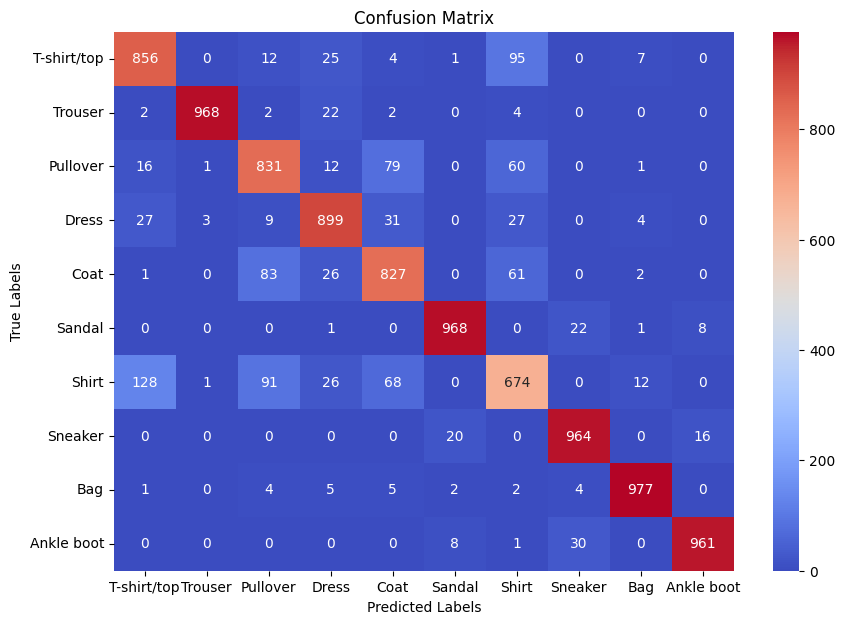

In [29]:
clf_svm = load_or_train("svc.model", svc)

# Make predictions on the test set
Y_test_pred_svc = clf_svm.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred_svc)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_test_pred_svc, label_names)

**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# List of hyperparameters to try
n_estimators_values = [50, 100, 200]
max_depth_values = [10, 20]     # Maximum depth of the tree

# Function to train the Random Forest model with given hyperparameters
def train_random_forest(X_train, Y_train, n_estimators, max_depth):
    model = RandomForestClassifier(random_state=123, n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
    model.fit(X_train, Y_train)
    return model

# Function to evaluate the model on a given dataset
def evaluate_model(model, X, Y):
    accuracy = accuracy_score(Y, model.predict(X))
    return accuracy

# Function to find the best model based on validation set
def find_best_random_forest():
    best_model = None
    best_val_accuracy = 0
    best_params = {}

    for n_estimators in n_estimators_values:
        for max_depth in max_depth_values:
            model = train_random_forest(X_tr, Y_tr, n_estimators, max_depth)
            val_accuracy = evaluate_model(model, X_val, Y_val)
            print(f"n_estimators={n_estimators}, max_depth={max_depth}, Validation Accuracy={val_accuracy:.4f}")

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

    # Print best hyperparameters and their accuracies
    best_train_accuracy = evaluate_model(best_model, X_tr, Y_tr)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Training Accuracy: {best_train_accuracy:.4f}")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model




# Load or train the Random Forest model
clf_rf = load_or_train("random_forest.model", find_best_random_forest)


Attempting to load model from random_forest.model
Model file not found. Training new model.
n_estimators=50, max_depth=10, Validation Accuracy=0.8519
n_estimators=50, max_depth=20, Validation Accuracy=0.8769
n_estimators=100, max_depth=10, Validation Accuracy=0.8539
n_estimators=100, max_depth=20, Validation Accuracy=0.8795
n_estimators=200, max_depth=10, Validation Accuracy=0.8536
n_estimators=200, max_depth=20, Validation Accuracy=0.8813
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20}
Best Training Accuracy: 0.9946
Best Validation Accuracy: 0.8813
Model saved to random_forest.model


Attempting to load model from random_forest.model
Model file found.
Test Accuracy: 0.8734


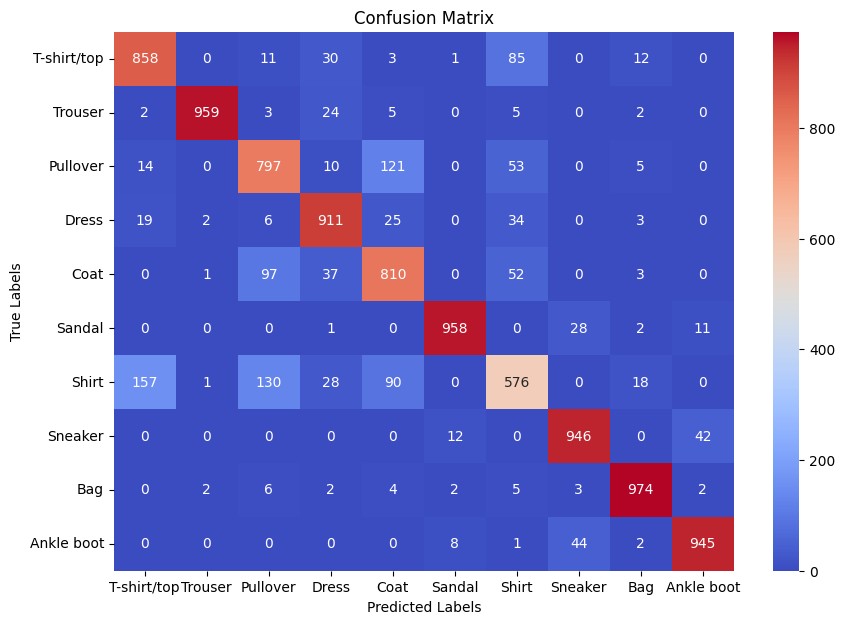

In [34]:
clf_rndm_frst = load_or_train("random_forest.model", find_best_random_forest)

# Make predictions on the test set
Y_test_pred_rf = clf_rndm_frst.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred_rf)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_test_pred_rf, label_names)

**Neural Network**

In [1]:
# Check if CUDA (GPU support) is available
def check_cuda():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        print(f"CUDA is available. {len(gpus)} GPU(s) detected.")
    else:
        print("CUDA is not available. Running on CPU.")

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

lr = 1e-3
model_filename = 'nn_model.keras'


# Check if CUDA (GPU support) is available
def check_cuda():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        print(f"CUDA is available. {len(gpus)} GPU(s) detected.")
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    else:
        print("CUDA is not available. Running on CPU.")

# Function to create and compile the neural network model
def create_neural_network(input_shape, learning_rate=lr):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))  # 256 neurons in the first hidden layer
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))  # 128 neurons in the first hidden layer
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))# 64 neurons in the second hidden layer
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))  # 10 classes for classification

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train the neural network model with EarlyStopping and ReduceLROnPlateau
def train_neural_network(X_train, Y_train, X_val, Y_val):
    input_shape = X_tr.shape[1]
    model = create_neural_network(input_shape)

    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=8, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)
    model_checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
    history = model.fit(X_tr, Y_tr, validation_data=(X_val, Y_val), epochs=100, batch_size=16,
                        callbacks=[early_stopping, lr_scheduler,model_checkpoint], verbose=2)

    # Load the best model after training
    model.load_weights(model_filename)
    return model, history

# Perform CUDA check
check_cuda()

# Example usage (assuming X_train, Y_train, X_val, Y_val are defined)
model, history = train_neural_network(X_tr, Y_tr, X_val, Y_val)

# Print model summary
model.summary()


CUDA is not available. Running on CPU.
Epoch 1/100

Epoch 1: val_loss improved from inf to 0.44891, saving model to nn_model.keras
2813/2813 - 33s - loss: 0.5779 - accuracy: 0.7954 - val_loss: 0.4489 - val_accuracy: 0.8343 - lr: 0.0010 - 33s/epoch - 12ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 0.44891
2813/2813 - 19s - loss: 0.4510 - accuracy: 0.8372 - val_loss: 0.4832 - val_accuracy: 0.8304 - lr: 0.0010 - 19s/epoch - 7ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.44891 to 0.44462, saving model to nn_model.keras
2813/2813 - 28s - loss: 0.4104 - accuracy: 0.8526 - val_loss: 0.4446 - val_accuracy: 0.8421 - lr: 0.0010 - 28s/epoch - 10ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.44462 to 0.37162, saving model to nn_model.keras
2813/2813 - 23s - loss: 0.3824 - accuracy: 0.8601 - val_loss: 0.3716 - val_accuracy: 0.8601 - lr: 0.0010 - 23s/epoch - 8ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.37162 to 0.34447, saving model to nn_model.keras
2813/28

Test Accuracy: 0.8850


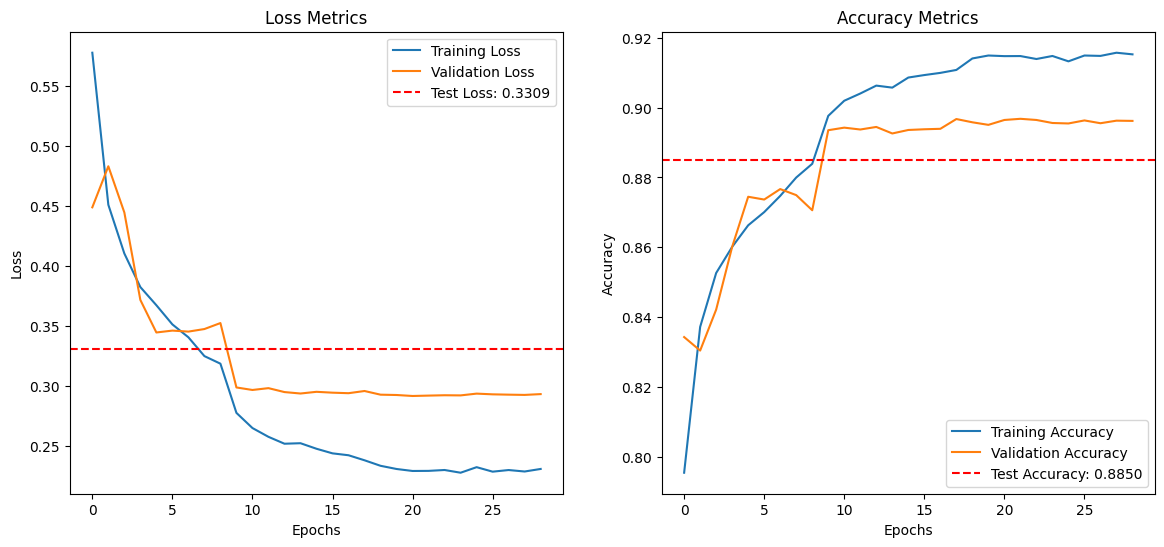

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming X_test and Y_test are defined
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

def plot_metrics(history, test_accuracy, test_loss):
    plt.figure(figsize=(14, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
    plt.title('Loss Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
    plt.title('Accuracy Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Assuming you have the 'history' object from training
plot_metrics(history, test_accuracy, test_loss)


Can we try different model, by changing number of neurons

**Convolutional Neural Networks**

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import pickle

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(ReLU())
    model.add(Dense(10, activation='softmax'))  # For multi-class classification

    return model

# Model filename
model_filename = 'cnn_model.keras'

# Create the model
input_shape = (28, 28, 1)  # FashionMNIST images are 28x28 pixels, 1 channel

def train_neural_network():
    model = create_cnn_model(input_shape)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
    model_checkpoint = ModelCheckpoint(model_filename, save_best_only=True, monitor='val_loss')

    history = model.fit(X_tr, Y_tr, validation_data=(X_val, Y_val), epochs=100, batch_size=,
                        callbacks=[early_stopping, lr_scheduler, model_checkpoint])

    # Save the history object for later use
    with open("training_history.pkl", 'wb') as f:
        pickle.dump(history.history, f)

    # Load the best model
    model.load_weights(model_filename)

    return model, history

# Ensure your data is reshaped correctly
X_tr = X_tr.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Modify load_or_train to handle the extra values
def load_or_train(filename, train_func):
    print(f"Attempting to load model from {filename}")
    if os.path.exists(filename):
        print("Model file found.")
        try:
            with open(filename, "rb") as f:
                model = create_cnn_model(input_shape)
                model.load_weights(filename)
                with open("training_history.pkl", 'rb') as hist_f:
                    history = pickle.load(hist_f)
                return model, history
        except (OSError, IOError, pickle.PickleError) as e:
            print(f"Error loading model: {e}")
    else:
        print("Model file not found. Training new model.")

    model, history = train_func()
    try:
        model.save_weights(filename)
        print(f"Model saved to {filename}")
    except (OSError, IOError, pickle.PickleError) as e:
        print(f"Error saving model: {e}")

    return model, history

# Load or train the model
model, history = load_or_train(model_filename, train_neural_network)
model.summary()


Attempting to load model from cnn_model.keras
Model file not found. Training new model.
Epoch 1/100
704/704 [==============================] - 75s 104ms/step - loss: 0.4720 - accuracy: 0.8310 - val_loss: 0.3481 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 2/100
704/704 [==============================] - 68s 97ms/step - loss: 0.3078 - accuracy: 0.8900 - val_loss: 0.2824 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 3/100
704/704 [==============================] - 66s 94ms/step - loss: 0.2607 - accuracy: 0.9061 - val_loss: 0.2705 - val_accuracy: 0.9012 - lr: 0.0010
Epoch 4/100
704/704 [==============================] - 69s 98ms/step - loss: 0.2304 - accuracy: 0.9169 - val_loss: 0.2667 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 5/100
704/704 [==============================] - 67s 95ms/step - loss: 0.2076 - accuracy: 0.9251 - val_loss: 0.2426 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 6/100
704/704 [==============================] - 72s 103ms/step - loss: 0.1854 - accuracy: 0.9318 - val_loss: 0.237

Test Accuracy: 0.9116


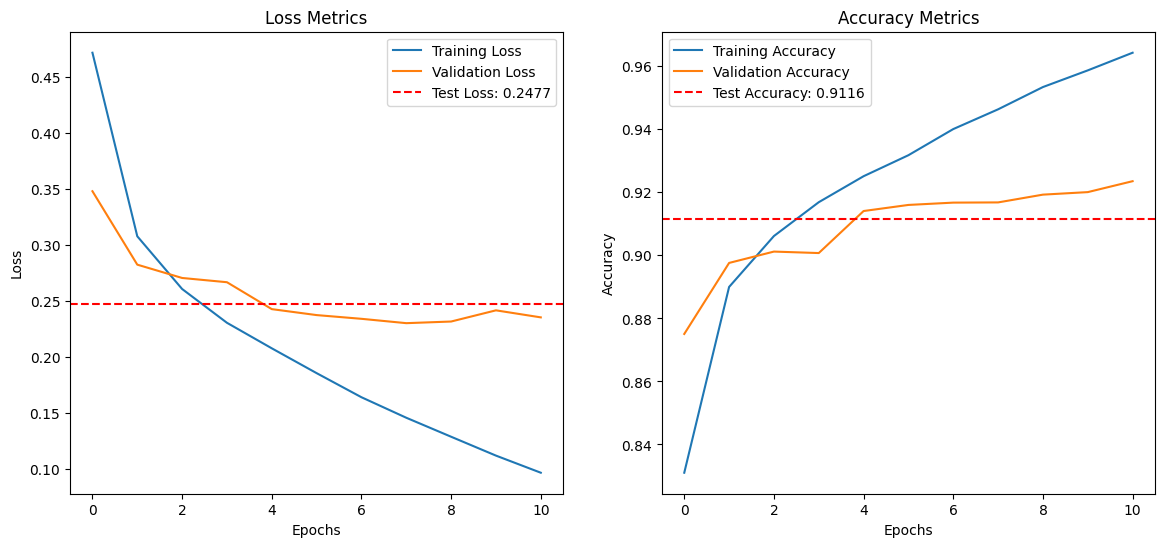

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming X_test and Y_test are defined
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

def plot_metrics(history, test_accuracy, test_loss):
    plt.figure(figsize=(14, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
    plt.title('Loss Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
    plt.title('Accuracy Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Assuming you have the 'history' object from training
plot_metrics(history, test_accuracy, test_loss)


313/313 [==============================] - 5s 17ms/step


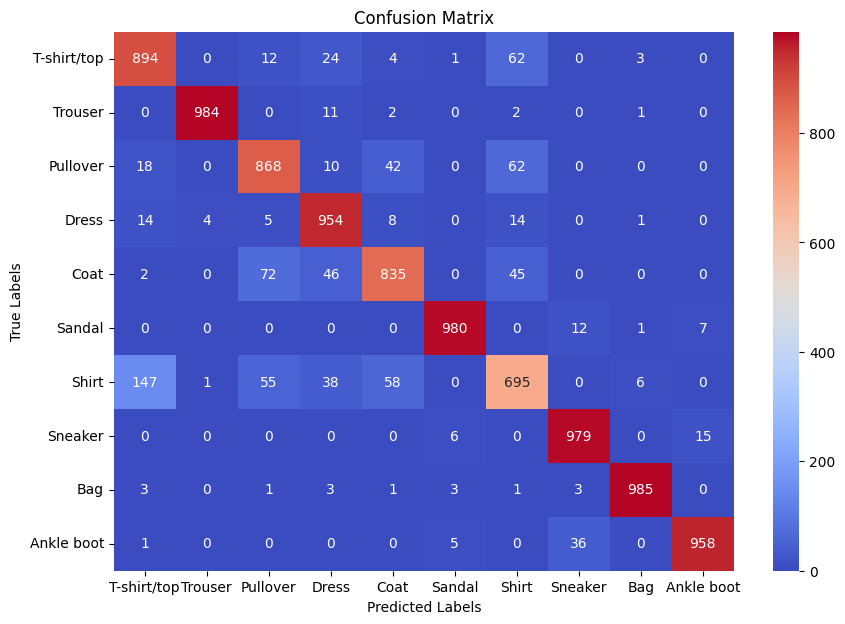

In [38]:
# Predicting on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = Y_test
# Define label names
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
def plot_confusion_matrix(y_true, y_pred, labels_dict):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Define the class labels using the labels_dict dictionary
    class_labels = [labels_dict[i] for i in range(len(labels_dict))]

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
# Call the confusion matrix function
plot_confusion_matrix(y_true, y_pred_classes, label_names)


Finally, lets plot some misclassified images with their true labels.

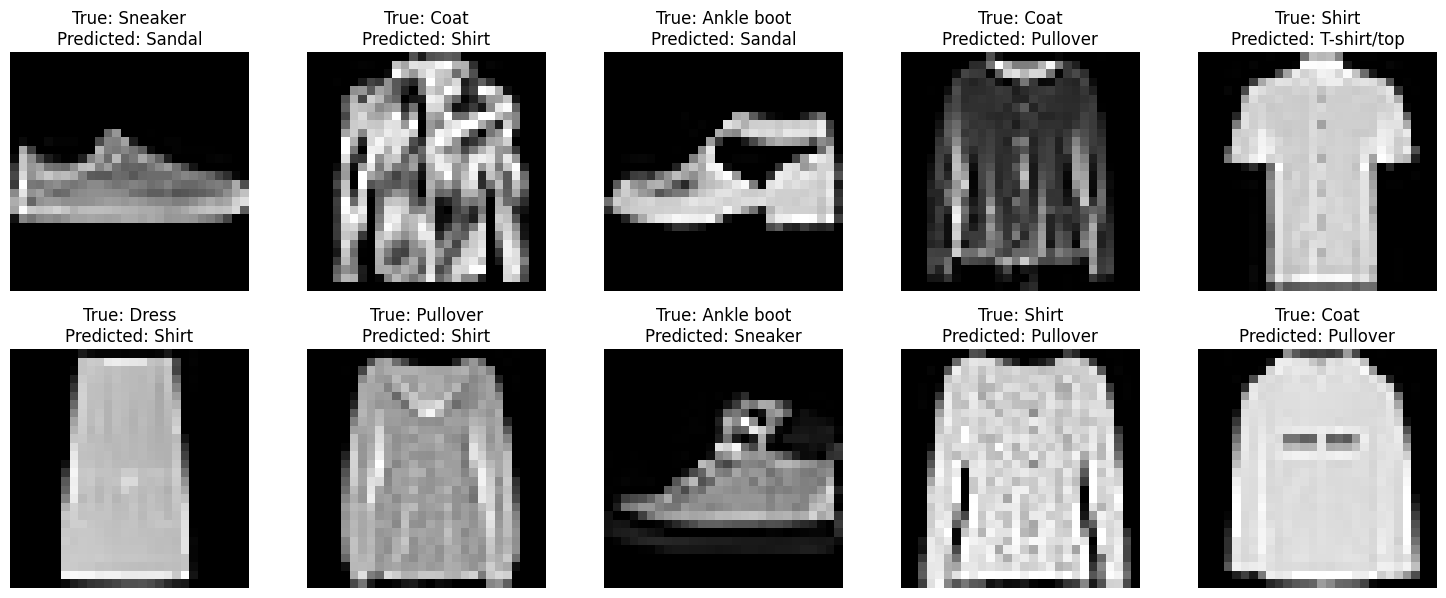

In [39]:
# Define label names
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Identify misclassified indices
misclassified_indices = np.where(y_true != y_pred_classes)[0]

# Plot misclassified images
def plot_misclassified_images(X_test, y_true, y_pred_classes, label_names, misclassified_indices, num_images=10):
    plt.figure(figsize=(15, 15))
    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_test[index], cmap='gray')
        plt.title(f"True: {label_names[y_true[index]]}\nPredicted: {label_names[y_pred_classes[index]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Call the function to plot misclassified images
plot_misclassified_images(X_test, y_true, y_pred_classes, label_names, misclassified_indices)


